In [26]:
import matplotlib.pyplot as plt
from baselines.common import plot_util as pu
import warnings
warnings.filterwarnings('ignore', 'Pandas doesn\'t allow')

If you want to average results for multiple seeds, LOG_DIRS must contain subfolders in the following format: ```<name_exp0>-0```, ```<name_exp0>-1```, ```<name_exp1>-0```, ```<name_exp1>-1```. Where names correspond to experiments you want to compare separated with random seeds by dash.

In [50]:
def plot(game):
    directory = f'logs/{game}/'
    results = pu.load_results(directory)
    fig = pu.plot_results(results, average_group=True, shaded_std=True)
    plt.title(game + ' results')
    return results

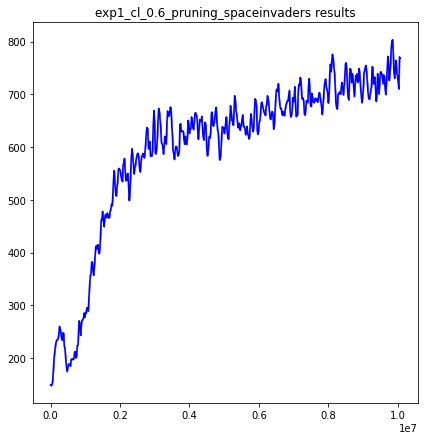

In [75]:
plot('exp1_cl_0.6_pruning_spaceinvaders');

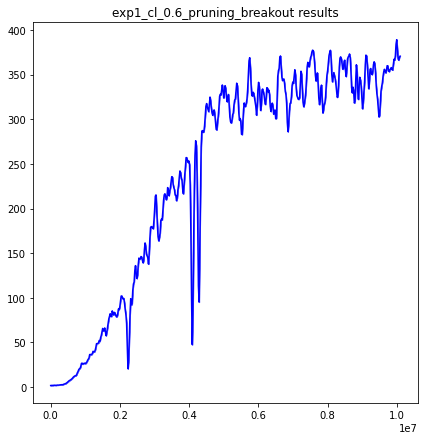

In [76]:
plot('exp1_cl_0.6_pruning_breakout');

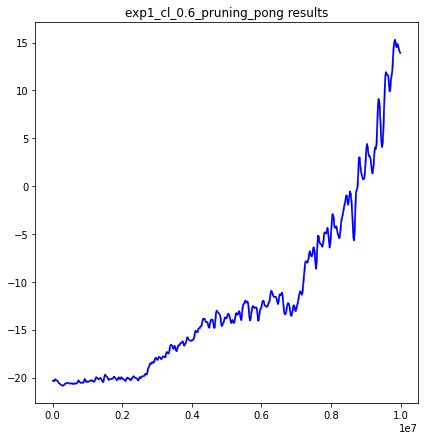

In [77]:
plot('exp1_cl_0.6_pruning_pong');

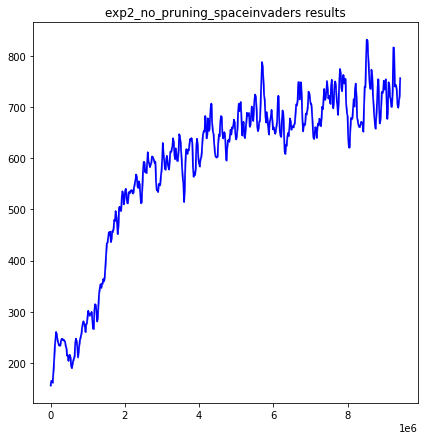

In [68]:
plot('exp2_no_pruning_spaceinvaders');

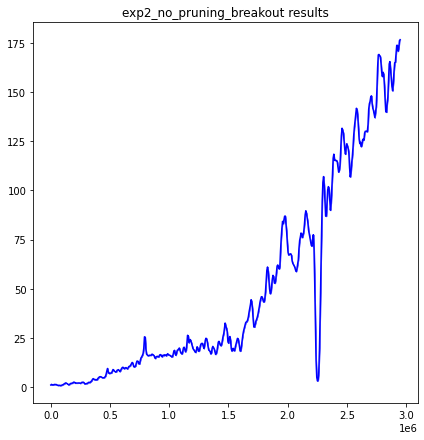

In [69]:
plot('exp2_no_pruning_breakout');

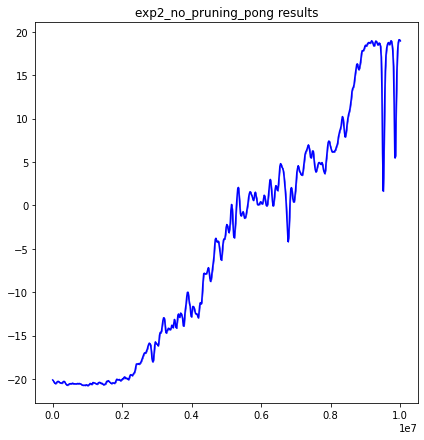

In [71]:
plot('exp2_no_pruning_pong');

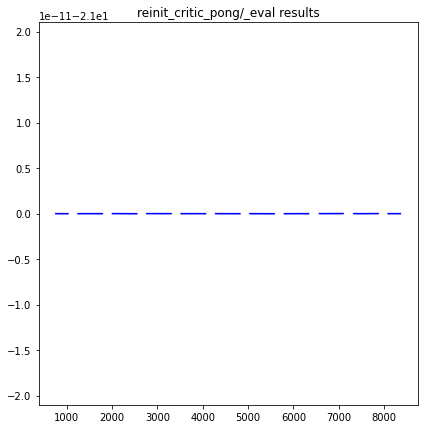

In [74]:
plot('reinit_critic_pong/_eval');